In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
metaData1 = pd.read_csv("data/esea_meta_demos.part1.csv")
metaData2 = pd.read_csv("data/esea_meta_demos.part2.csv")
metaData = pd.concat([metaData1, metaData2]) # combinar os dados

In [86]:
metaData.head()

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550


In [87]:
metaData.shape

(377629, 10)

In [88]:
metaData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377629 entries, 0 to 161709
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   file           377629 non-null  object 
 1   map            377629 non-null  object 
 2   round          377629 non-null  int64  
 3   start_seconds  377589 non-null  float64
 4   end_seconds    377589 non-null  float64
 5   winner_team    377628 non-null  object 
 6   winner_side    377628 non-null  object 
 7   round_type     377629 non-null  object 
 8   ct_eq_val      377629 non-null  int64  
 9   t_eq_val       377629 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 31.7+ MB


In [89]:
metaData

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550
...,...,...,...,...,...,...,...,...,...,...
161705,esea_match_13829173.dem,de_mirage,18,1647.20600,1694.6550,Team 1,Terrorist,ECO,4500,21950
161706,esea_match_13829173.dem,de_mirage,19,1694.65500,1753.4380,Team 1,Terrorist,NORMAL,16400,26100
161707,esea_match_13829173.dem,de_mirage,20,1753.43800,1803.6580,Team 1,Terrorist,FORCE_BUY,15100,26000
161708,esea_match_13829173.dem,de_mirage,21,1803.65800,1856.0850,Team 1,Terrorist,NORMAL,17550,25500


## Prevalência do Mapa

In [90]:
mapPrevalence = metaData.groupby(['file','map']).count().reset_index()[['file','map']]
mapPrevalence = mapPrevalence['map'].value_counts().reset_index()
mapPrevalence['map'] = mapPrevalence['map'].str.replace('de_', '')

In [91]:
mapPrevalence.head()

,map,count
0,mirage,5279
1,cache,5018
2,inferno,2080
3,overpass,940
4,dust2,804


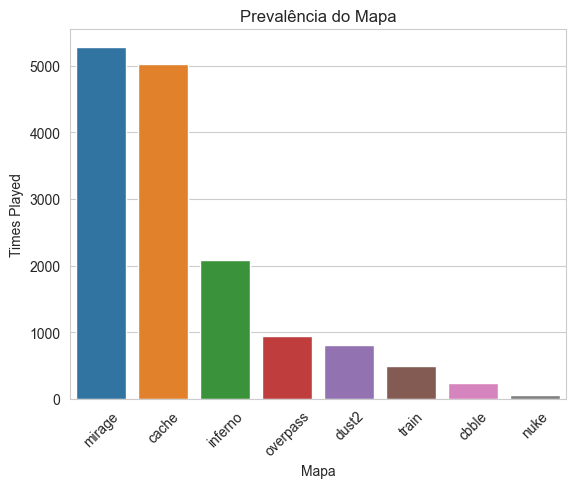

In [92]:
sns.barplot(x='map', y='count', data=mapPrevalence)
plt.xlabel('Mapa')
plt.ylabel('Times Played')
plt.title('Prevalência do Mapa')
plt.xticks(rotation=45)
plt.show()

## Game Time

In [93]:
metaData

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550
...,...,...,...,...,...,...,...,...,...,...
161705,esea_match_13829173.dem,de_mirage,18,1647.20600,1694.6550,Team 1,Terrorist,ECO,4500,21950
161706,esea_match_13829173.dem,de_mirage,19,1694.65500,1753.4380,Team 1,Terrorist,NORMAL,16400,26100
161707,esea_match_13829173.dem,de_mirage,20,1753.43800,1803.6580,Team 1,Terrorist,FORCE_BUY,15100,26000
161708,esea_match_13829173.dem,de_mirage,21,1803.65800,1856.0850,Team 1,Terrorist,NORMAL,17550,25500


In [94]:
gameRounds = metaData[['file','round']].groupby('file').max().reset_index()

In [95]:
gameRounds

,file,round
0,esea_match_13770997.dem,25
1,esea_match_13779704.dem,39
2,esea_match_13779769.dem,22
3,esea_match_13779770.dem,29
4,esea_match_13779771.dem,27
...,...,...
14916,esea_match_13829155.dem,29
14917,esea_match_13829165.dem,24
14918,esea_match_13829169.dem,18
14919,esea_match_13829171.dem,24


In [96]:
startTime = metaData[['file','start_seconds']].groupby('file').min().mean()

In [97]:
startTime

start_seconds    138.360112
dtype: float64

In [98]:
gameTime = metaData[['file','end_seconds']].groupby('file').max()

In [99]:
gameTime = gameTime.rename(columns = {'end_seconds':'Game Time (min)'}) - startTime.iloc[0]
gameTime /= 60

In [100]:
gameTime

,Game Time (min)
file,
esea_match_13770997.dem,34.493148
esea_match_13779704.dem,66.924148
esea_match_13779769.dem,43.732731
esea_match_13779770.dem,44.959115
esea_match_13779771.dem,44.812698
...,...
esea_match_13829155.dem,40.075615
esea_match_13829165.dem,29.855648
esea_match_13829169.dem,26.768698


<Axes: xlabel='Game Time (min)'>

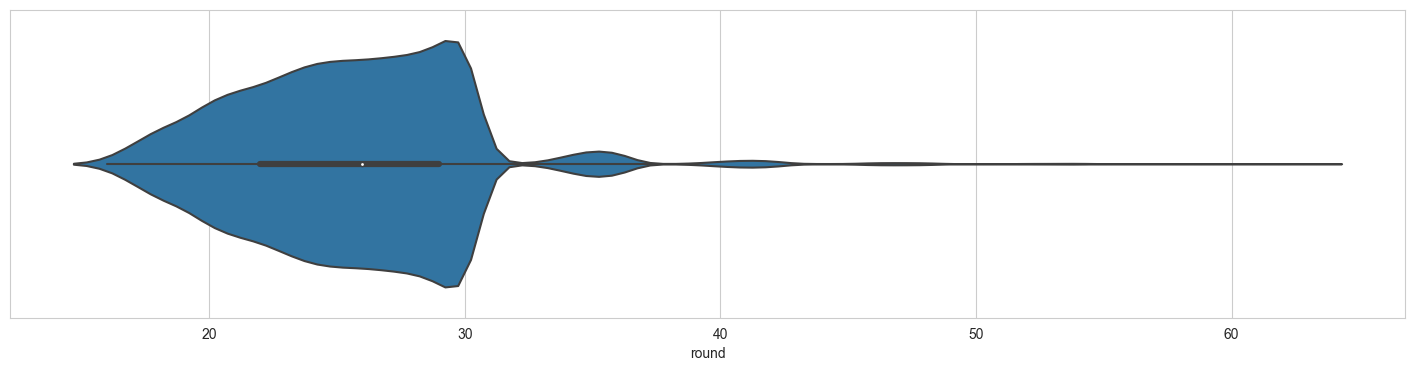

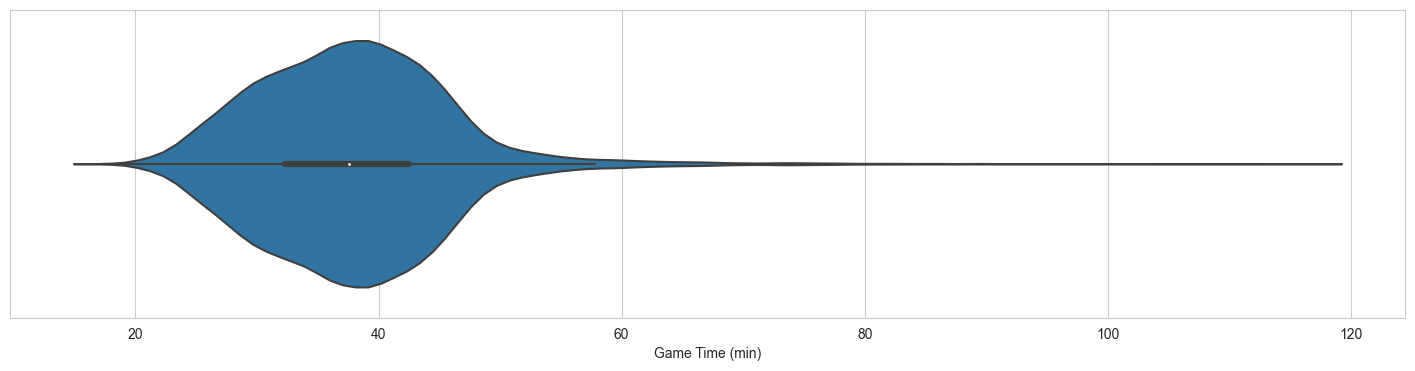

In [101]:
# number of rounds and minutes per game

fig, ax = plt.subplots(figsize=(18,4))
sns.violinplot(x='round', data = gameRounds, ax = ax)

fig2, ax2 = plt.subplots(figsize=(18,4))
sns.violinplot(x='Game Time (min)', data = gameTime, ax = ax2)

- The top graph shows that games generally have between 20 and 30 rounds. <br>
- The bottom graph shows that games generally last between 30 and 45 minutes.

## Análise de vitórias por mapa

In [102]:
matchData = pd.read_csv("data/mm_master_demos.csv")

In [103]:
terrorist_wins = matchData[matchData['winner_side'] == 'Terrorist'].groupby('map').size()
total_rounds = matchData.groupby('map').size()
win_percentage = (terrorist_wins / total_rounds) * 100
new_df = pd.DataFrame({'Mapa': win_percentage.index, 'Vitória: Terroristas(%)': win_percentage.values, 'Vitória: Contra-Terroristas(%)': 100 - win_percentage.values})
new_df

,Mapa,Vitória: Terroristas(%),Vitória: Contra-Terroristas(%)
0,cs_agency,49.375780,50.624220
1,cs_assault,49.167222,50.832778
2,cs_insertion,30.628571,69.371429
3,cs_italy,63.126844,36.873156
4,cs_office,58.825765,41.174235
5,de_austria,69.473684,30.526316
6,de_aztec,33.211009,66.788991
7,de_blackgold,41.625207,58.374793
8,de_cache,53.676420,46.323580
9,de_canals,49.874135,50.125865


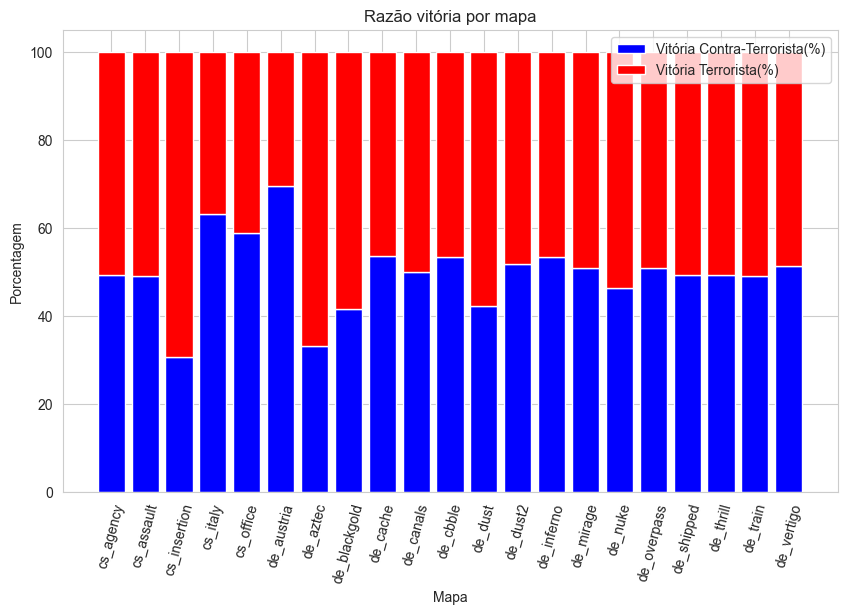

In [104]:
categorias = new_df['Mapa']

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
plt.bar(categorias, new_df['Vitória: Terroristas(%)'], color='blue', label='Vitória Contra-Terrorista(%)')
plt.bar(categorias, new_df['Vitória: Contra-Terroristas(%)'], bottom=new_df['Vitória: Terroristas(%)'], color='red', label='Vitória Terrorista(%)')
sns.set_style("whitegrid")
plt.xlabel('Mapa')
plt.ylabel('Porcentagem')
plt.title('Razão vitória por mapa')


plt.legend()
plt.xticks(rotation=75)
# Exibindo o gráfico
plt.show()

## Quais armas são mais utilizadas

In [105]:
killsData1 = pd.read_csv("data/esea_master_kills_demos.part1.csv")
killsData2 = pd.read_csv("data/esea_master_kills_demos.part2.csv")
killsData = pd.concat([killsData1, killsData2])

In [106]:
killsData.head()

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted
0,esea_match_13770997.dem,1,16058,30.74165,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,5,4,False
1,esea_match_13770997.dem,1,16210,31.93185,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,4,4,False
2,esea_match_13770997.dem,1,16510,34.28094,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,3,4,False
3,esea_match_13770997.dem,1,17104,38.93212,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,3,3,False
4,esea_match_13770997.dem,1,17338,40.76441,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,2,3,False


In [107]:
weaponData = killsData.groupby(['wp_type','wp']).count().reset_index()[['wp_type','wp','file']]
weaponData = weaponData.rename(columns = {'wp_type':'Weapon Type', 'wp':'Arma', 'file':'Mortes'})
weaponData.head()

,Weapon Type,Arma,Mortes
0,Equipment,Knife,4779
1,Equipment,Zeus,1612
2,Grenade,Decoy,1
3,Grenade,Flash,10
4,Grenade,HE,19099


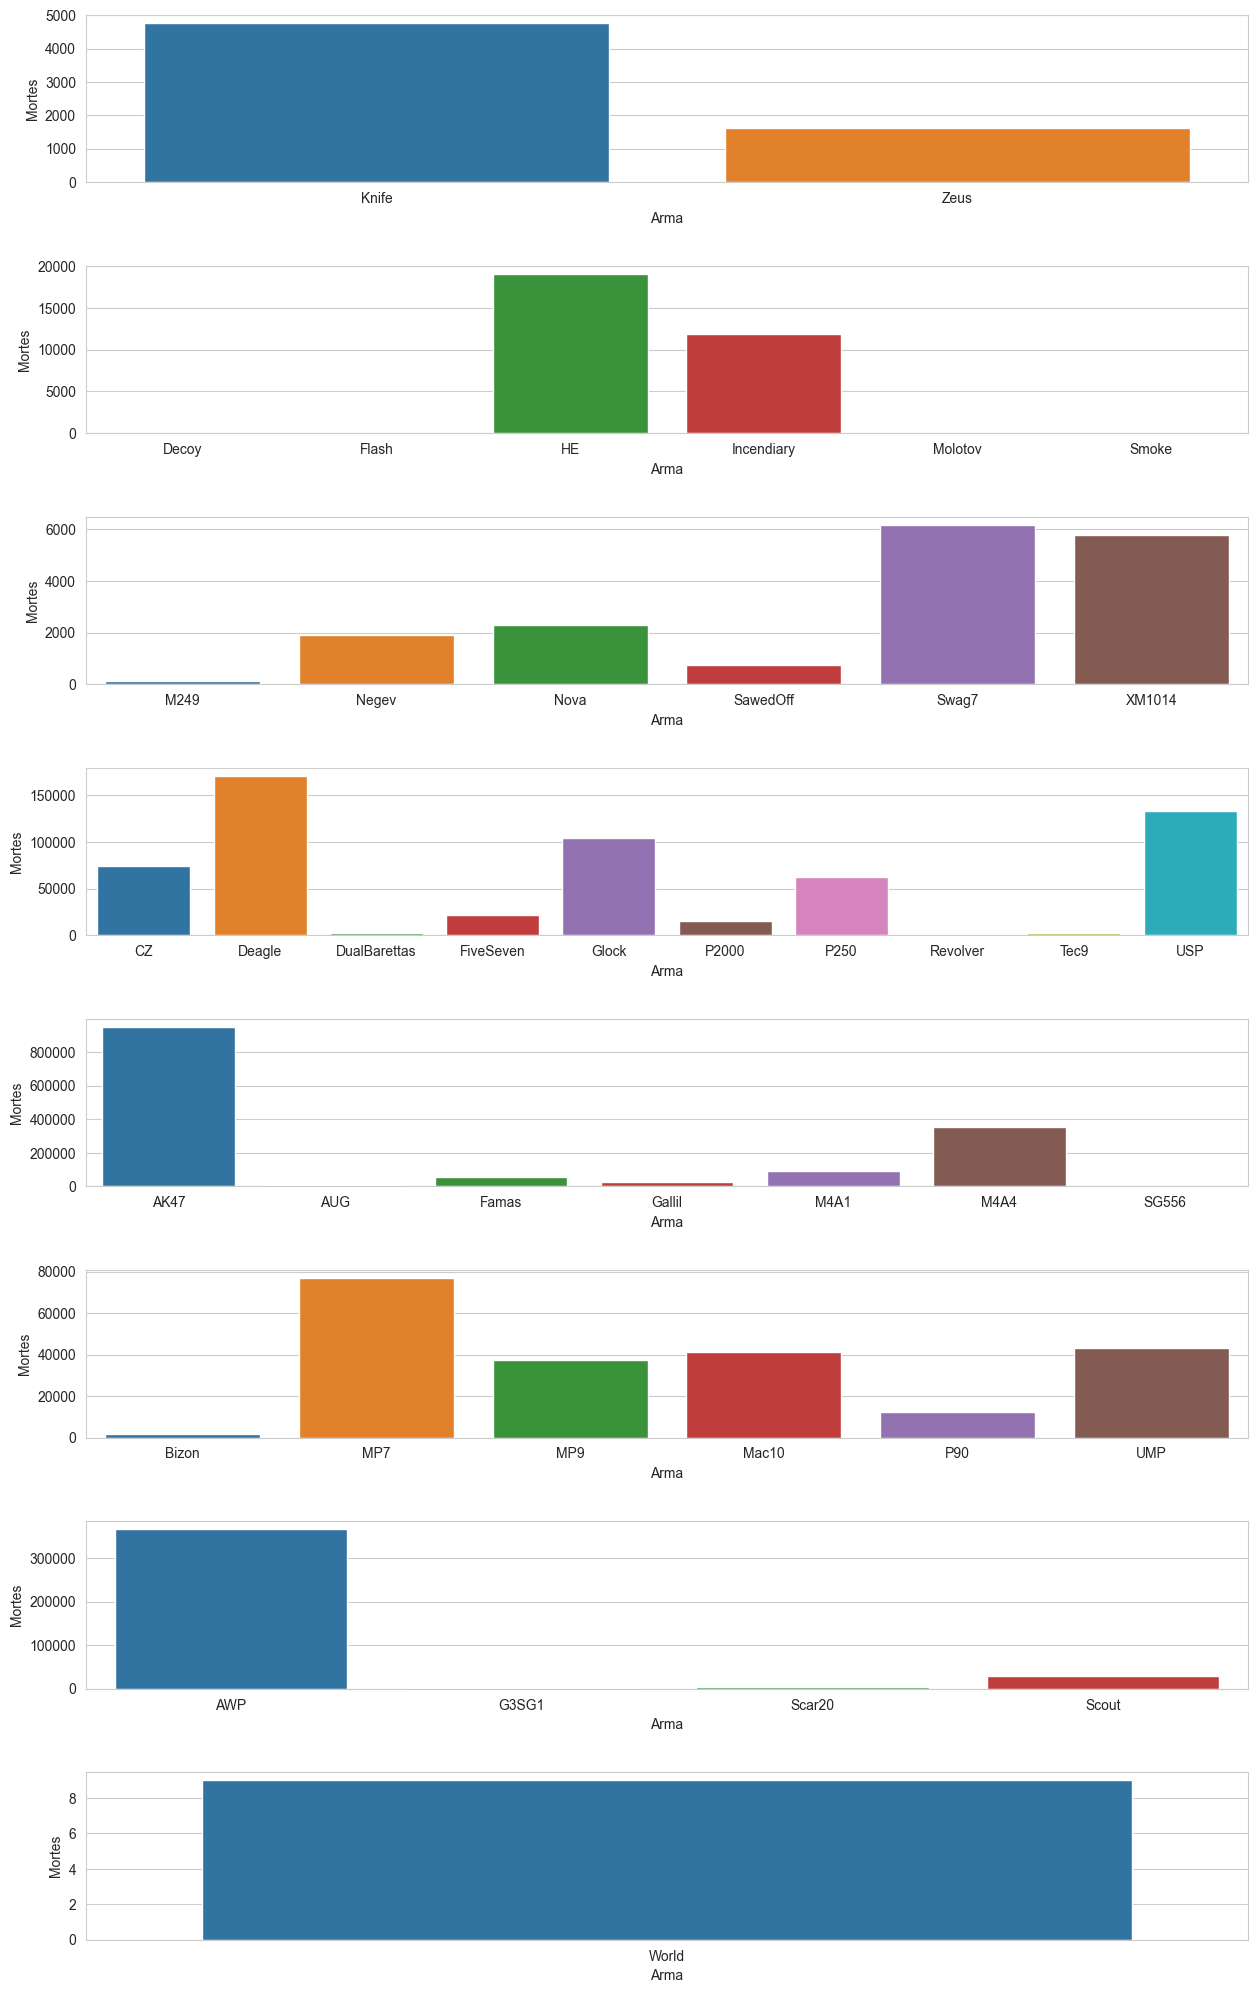

In [108]:
fig, axs = plt.subplots(ncols=1, nrows=8, figsize = (15,25)) # create 8 subplots
fig.subplots_adjust(wspace=0,
                    hspace=0.5)
for ax_num in range(len(axs)): 
    weaponType = weaponData['Weapon Type'].unique()[ax_num]
    dataToPlot = weaponData[weaponData['Weapon Type']==weaponType]
    sns.barplot(x='Arma', y='Mortes', data=dataToPlot, ax = axs[ax_num])

## Quais partes do corpo são mais atingidas?

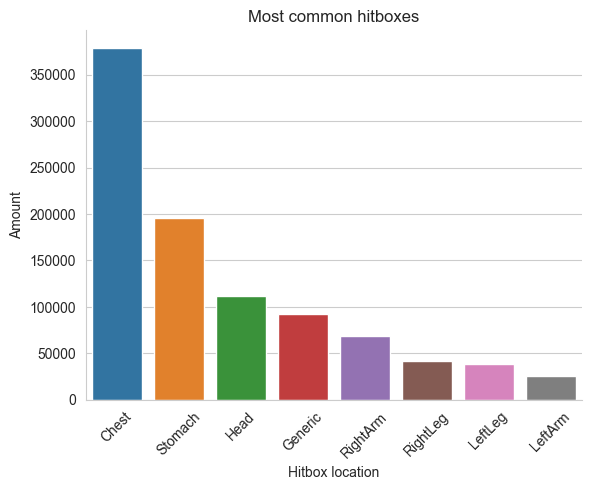

In [117]:
hitbox_counts = matchData['hitbox'].value_counts()
hitbox_order = hitbox_counts.index


g = sns.countplot(x='hitbox', data=matchData, order=hitbox_order)

# Removendo as bordas do gráfico
sns.despine()

g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.xlabel('Posição do hitbox')
plt.ylabel('Quantidade')
plt.title('Hitboxes mais comuns')

plt.show()


### Partes mais atingidas por Snipers

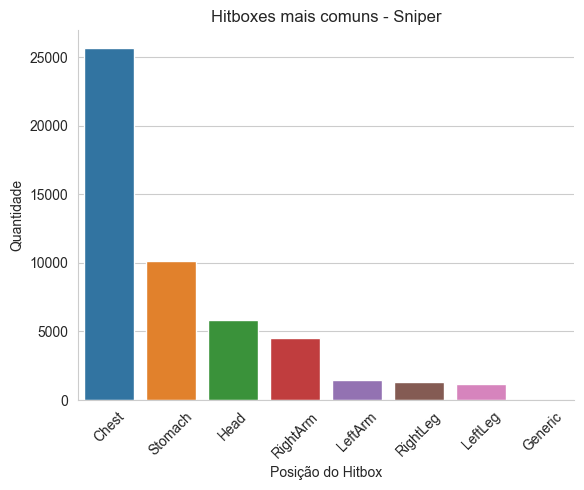

In [120]:
# Filtrando as hitboxes para as armas do tipo Sniper
sniper_box = matchData.loc[matchData['wp_type'] == 'Sniper', 'hitbox']
sniper_box = pd.DataFrame(sniper_box)  # Convertendo para DataFrame

# Criando o gráfico de contagem das hitboxes para armas Sniper
g = sns.countplot(x='hitbox', data=sniper_box, order=sniper_box['hitbox'].value_counts().index)

sns.despine()

g.set_xticklabels(g.get_xticklabels(), rotation=45)

# Adicionando rótulos de eixo, título
plt.xlabel('Posição do Hitbox')
plt.ylabel('Quantidade')
plt.title('Hitboxes mais comuns - Sniper')

# Exibindo o gráfico
plt.show()


### Partes mais atingidas por Pistolas

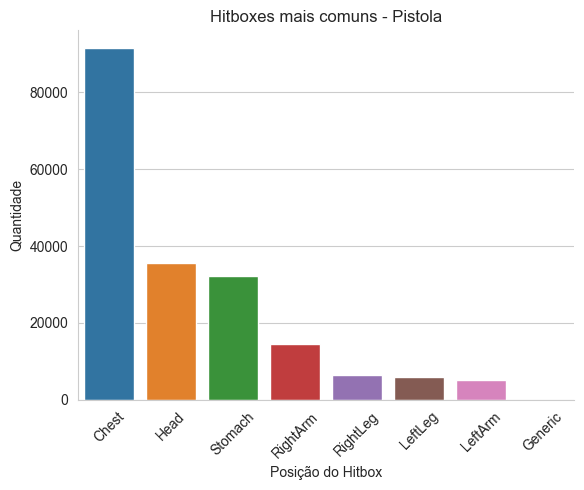

In [121]:
# Filtrando as hitboxes para as armas do tipo Pistola
pistol_box = matchData.loc[matchData['wp_type'] == 'Pistol', 'hitbox']
pistol_box = pd.DataFrame(pistol_box)  # Convertendo para DataFrame

# Criando o gráfico de contagem das hitboxes para armas Pistola
g = sns.countplot(x='hitbox', data=pistol_box, order=pistol_box['hitbox'].value_counts().index)

sns.despine()

g.set_xticklabels(g.get_xticklabels(), rotation=45)

# Adicionando rótulos de eixo, título
plt.xlabel('Posição do Hitbox')
plt.ylabel('Quantidade')
plt.title('Hitboxes mais comuns - Pistola')

# Exibindo o gráfico
plt.show()
